# Initialization

Interactive use of the `scqubits` library from a jupyter notebook starts with importing the `scqubits` library. Additional imports, e.g.,  `numpy` and the QuTiP library are optional.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import scqubits as qubit
import scqubits.utils.plotting as plot

import numpy as np
from qutip import *

/home/dkweiss/anaconda3/envs/venv/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Flux Qubit

$H_\text{flux}=(n_{i}-n_{gi})4(E_\text{C})_{ij}(n_{j}-n_{gj})
                -E_{J}\cos\phi_{1}-E_{J}\cos\phi_{2}-\alpha E_{J}\cos(2\pi f + \phi_{1} - \phi_{2}), \; i,j\in\{1,2\}$

In [2]:
# parameters for the flux qubit
RATIO = 60.0
ALPHA = 0.8

flux_qubit = qubit.FluxQubit(
    EJ1 = 1.0, 
    EJ2 = 1.0, 
    EJ3 = ALPHA*1.0, 
    ECJ1 = 1.0/RATIO, 
    ECJ2 = 1.0/RATIO, 
    ECJ3 = 1.0/ALPHA/RATIO, 
    ECg1 = 50.0/RATIO, 
    ECg2 = 50.0/RATIO, 
    ng1 = 0.0, 
    ng2 = 0.0, 
    flux = 0.45, 
    ncut = 10,
)

In [3]:
flux_qubit

flux qubit
 ———— PARAMETERS ————
truncated_dim	: None
ECJ3	: 0.020833333333333332
EJ1	: 1.0
ECJ1	: 0.016666666666666666
EJ3	: 0.8
ECJ2	: 0.016666666666666666
ECg1	: 0.8333333333333334
ncut	: 10
ECg2	: 0.8333333333333334
EJ2	: 1.0
flux	: 0.45
ng1	: 0.0
ng2	: 0.0
Hilbert space dimension	: 441

### Potential energy for flux qubit

(<Figure size 288x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa8d1d8f828>)

/home/dkweiss/anaconda3/envs/venv/lib/python3.5/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


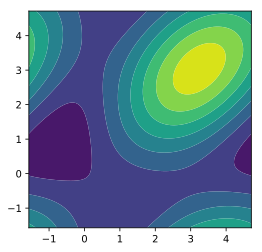

In [4]:
flux_qubit.plot_potential()

### Eigenenergies

In [5]:
evals, evecs = flux_qubit.eigensys()

In [6]:
evals

array([-1.39408879, -1.16358534, -1.11509225, -0.98817209, -0.94604519,
       -0.88385204])


[====================] 100% Done.


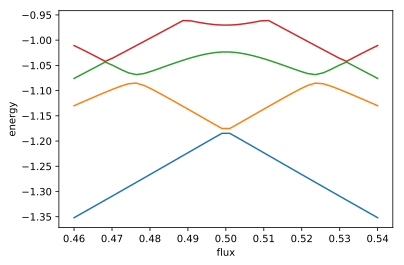

CPU times: user 10.3 s, sys: 524 ms, total: 10.8 s
Wall time: 1.79 s


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa8d06c85f8>)

In [7]:
flux_list = np.linspace(.46, .54, 40)
%time flux_qubit.plot_evals_vs_paramvals('flux', flux_list, evals_count=4, subtract_ground=False,)

### Eigenfunctions

(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa8d06c8e80>)

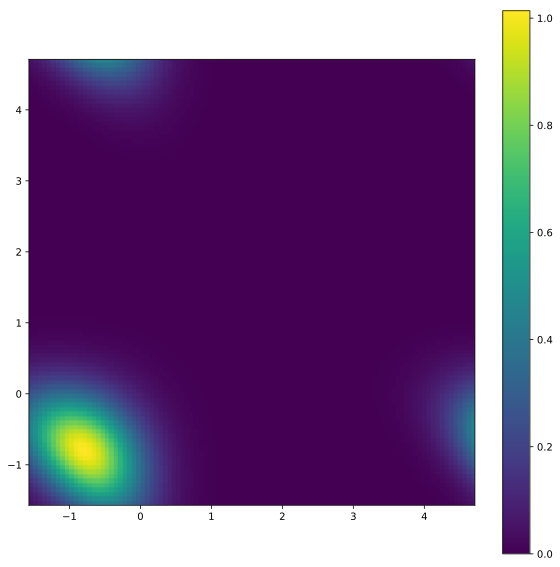

In [8]:
esys = flux_qubit.eigensys()
flux_qubit.plot_wavefunction(esys, which=0, mode='real')